## Regonstruktion TripAdvisor Beispiel von Kaggle

Kompletter Code verfügbar in Kaggle:
https://deepnote.com/@abid/Trip-Advisor-Data-AnalysisML-f6060b39-d76c-4579-9648-a54bc8b5ffb5

### shows all available conda environments
conda info --envs    

### creates a new conda environment with Python 3.8
conda create -n adsprojekt python=3.8       

### activates the new conda environment
conda activate adsprojekt                    

### resolves issue with missing ipykernel
conda install -p c:\Users\Roger\anaconda3\envs\adsprojekt ipykernel --update-deps --force-reinstall

### Install majority list of packages (place file in folder first)
pip install -r requirements.txt

In [ ]:
## All purpose
import pandas as pd 
import numpy as np

In [ ]:
## pip install wordcloud

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

In [ ]:


## NLP
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
## Deeplearning/ML
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
import tensorflow.keras.layers as L
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
## eigene Imports aufgrund Code Error
import nbformat

## Preprocessing
VADER-Sentiment-Analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the MIT License (we sincerely appreciate all attributions and readily accept most contributions, but please don't hold us liable).

Compund score & Sentiment
Using Vader to get sentimental scores and then converting those scores into 3 categorical Sentiments, Positive Negative, and Neutral.

In [ ]:
## Creating sentimental polarity 
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

## Applying functions
Applying both functions to our original database to create two additional columns of Sentiment_score and Sentiment.

In [58]:
## Importing CSV file
df = pd.read_csv("tripadvisor_hotel_reviews.csv")

df.head()



,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
## Applying Compund score
polarity_scores = df["Review"].astype("str").apply(compound_score)
df["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df["Sentiment"] = df["Sentiment_Score"].apply(sentiment)

## Saving file
Saving file so it can be used later for another project.

In [ ]:
## Saving preprocessed file 
df.to_csv("Trip-Advisor-rating-sentiments.csv",index=False)
df.Sentiment.value_counts()

## Loading Preprocessed Dataset
The Dataset contains four columns ** Review - Rating - Sentiment_score - Sentiment**

In [57]:
# Importing the Trip-Advisor-Hotel-Review Dataset
data=pd.read_csv('Trip-Advisor-rating-sentiments.csv')

# Having a look at the data
data.head()

,Review,Rating,Sentiment_Score,Sentiment
0,nice hotel expensive parking got good deal sta...,4,0.9626,Positive
1,ok nothing special charge diamond member hilto...,2,0.9870,Positive
2,nice rooms not 4* experience hotel monaco seat...,3,0.9842,Positive
3,"unique, great stay, wonderful time hotel monac...",5,0.9920,Positive
4,"great stay great stay, went seahawk game aweso...",5,0.9870,Positive


## Checking Missing Values
No missing data in our dataset.

In [ ]:
data.isna().sum()

## Countplot of Sentiments
Most of the comments are Positive, as shown in seaborn countplot

In [ ]:
sns.countplot(data=data,x="Sentiment",palette="pastel");

## Visualization
### Plotting the Bar Graph
In the bar plot, we can see the distribution of sentiment and rating, people with 5-star ratings have the highest positive sentiment. whereas at lower ratings its mixed emotions showed by customers review, this can be related to sarcasm

In [ ]:
# Preparing data for visualization 
Viz_1 = data[['Rating','Sentiment']].value_counts().rename_axis(['Rating','Sentiment']).reset_index(name='counts')

# Plotting the Bar Graph 
fig = px.bar(x=Viz_1.Rating, y=Viz_1.counts, color=Viz_1.Sentiment,color_discrete_sequence=px.colors.qualitative.Pastel,title="Sentiment & Ratings",labels={'x':'Ratings','y':'Total Number'})
fig.show()

## Plotting a pie chart of ratings
A simple pie chart using Plotly library can give you an idea of the distribution of different ratings. The majority of people are giving a positive and 4-5star rating.

In [ ]:
#Viz2 Data preparation 
Viz_2 = data['Rating'].value_counts().rename_axis(['Rating']).reset_index(name='counts')
    
# Plotting  pie chart for ratings
fig_pie = px.pie(values=Viz_2.counts, names=Viz_2.Rating, title='Rating Distribution of the data',color_discrete_sequence=px.colors.qualitative.Pastel)
fig_pie.show()

## Jointplot on the basis of Rating and Sentiment Score.
Joint plot reg shows on who sentimental score is directly affected by ratings, but it's all over the place, you won't find certain pattern or clusters.

In [ ]:
# Jointplot on the basis of Rating and Sentiment Score of the data
jp = sns.jointplot(data=data,x='Rating',y='Sentiment_Score',kind="reg",color='#ff7373')
# jp.fig.suptitle('Jointplot on the basis of Rating and Sentiment Score of the data',fontsize=20);

## Violin plot
Violion plot gives us a better picture of the relationship between Ratings and Sentiments. From 3 to 5 rating most of the review sentiments are positive.

In [ ]:
fig = go.Figure()

Ratings = [1,2,3,4,5]

for rating in Ratings:
    fig.add_trace(go.Violin(x=data['Rating'][data['Rating'] == rating],
                            y=data['Sentiment_Score'][data['Rating'] == rating],
                            name=rating,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title="Violin plot of Rating and Sentiment Score with box plot",
    xaxis_title="Rating",
    yaxis_title="Sentiment Score",
    font=dict(
        family="Courier New, monospace",
        size=12,
        
    )
)
fig.show()

# Keywords
## Testing Gensim Keywords
gensim.summarization.keywords

This module contains functions to find keywords of the text and building graph on tokens from text. More can be found at Gensim

I have used Deepnote input and added random text from the internet to test our Gensim Keyword function.

keywords(input_1).split("\n")
['pipelines',
 'pipeline',
 'platform',
 'developers',
 'development',
 'sdk',
 'tfx',
 'kubernetes']

## Applying Keywords to the Dataframe

In [21]:
data["keywords"] = data["Review"].apply(keywords)
data["keywords"] = data["keywords"].astype("str").str.replace('\n',',',) 

In [22]:
words = []
for x in data.keywords.values:
    x=x.split(",")
    for i in x:
        words.append(i)

## Using Counter
Python Counter is a container that will hold the count of each of the elements present in the container. More information can be found here guru99

In [23]:
from collections import Counter
word_counter = Counter(words)

In [24]:
word_df = pd.DataFrame(np.array(list(word_counter.items())),columns=["keyword","count"])

## Top Ten Keywords

In [25]:
word_df["count"] = word_df["count"].astype(int)
word_df = word_df.sort_values(['count'], ascending=False)
top_20 = word_df[0:19]
word_df.head(10)

,keyword,count
12,hotel,7992
4,room,7754
1,stay,4711
108,rooms,4474
61,great,3075
26,good,2747
131,stayed,2744
13,hotels,2373
37,staff,2290
5,night,2180


## Barplot of Top 20 Keywords
apart from hotel rooms users are also talking about staff, location and breakfast.

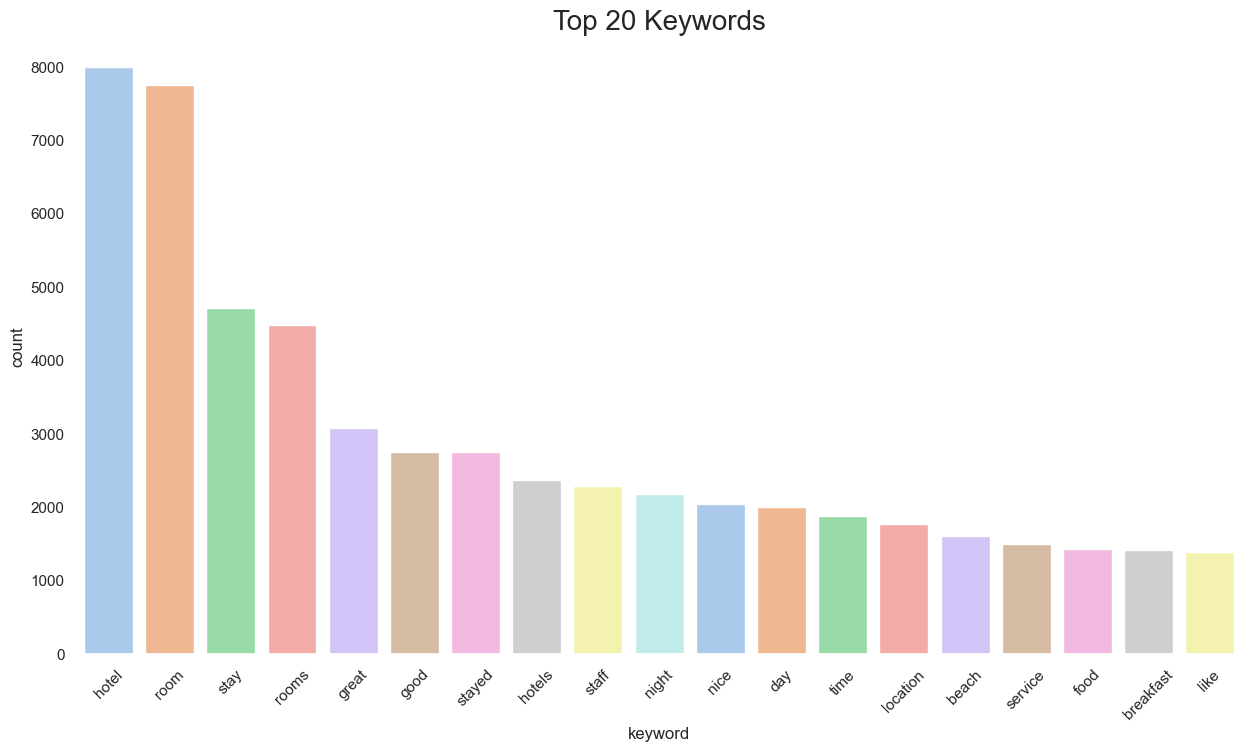

In [26]:
sns.set(rc={'figure.figsize':(15,8)})
fig, ax = plt.subplots()

ax = sns.barplot(data=top_20,x="keyword",y="count",palette="pastel")
ax.patch.set_visible(False)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Top 20 Keywords",fontsize=20);

## Review Text Processing using NLTK
Downloading NLTK

In [27]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Roger\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Roger\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Roger\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

## Removing most used words
To imporve model performance and to increase accuray.

In [28]:
top5 = ["hotel","room","rooms","hotels"]
for x in top5:
    data["Review"] = data["Review"].astype(str).str.replace(x,"")

In [29]:
data.head(2)

,Review,Rating,Sentiment_Score,Sentiment,keywords
0,nice expensive parking got good deal stay an...,4,0.9626,Positive,"parking,stay,staying,nice hotel,room,night,hal..."
1,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"hotel,hotels,room,suite,suites,suits,arrival e..."


## Stopwords
The stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search. Wikipedia

In [30]:
data2=data.copy()
      
def removing_stop_words(txt):
    stop_words = set(stopwords.words('english')) 

    word_tokens = word_tokenize(txt) 

    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
     
    return filtered_sentence
    
data2["Review"] = data2["Review"].apply(removing_stop_words)

## Text Lemmatizer
Lemmatization is the process of converting a word to its base form. The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors. For more information visit Lemmatization Approaches with Examples in Python

In [31]:
# Making a function to lemmatize 
lemmatizer = WordNetLemmatizer() 
def lemmatize(data):
    lema_data=[]
    for j in data:
        x=j.lower()
        x=lemmatizer.lemmatize(j,pos='n')
        x=lemmatizer.lemmatize(j,pos='v')
        x=lemmatizer.lemmatize(j,pos='a')
        x=lemmatizer.lemmatize(j,pos='r')
        x=lemmatizer.lemmatize(x)
        lema_data.append(x)
    return lema_data


data2["Review"] = data2["Review"].apply(lemmatize)

## Text Joining
Making all the comma seperated lemmatized words back into a string

In [32]:
data2["Review"] = data2["Review"].apply(lambda x:" ".join(token for token in x))

In [33]:
data2.head(2)

,Review,Rating,Sentiment_Score,Sentiment,keywords
0,nice expensive parking got good deal stay anni...,4,0.9626,Positive,"parking,stay,staying,nice hotel,room,night,hal..."
1,ok nothing special charge diamond member hilto...,2,0.9870,Positive,"hotel,hotels,room,suite,suites,suits,arrival e..."


You can use PoerterStemmer to improve the performance and you can also use other yet processing to improve the performance metric.

## Tokenizer
The Tokenizer class of Keras is used for vectorizing a text corpus. For this either, each text input is converted into integer sequence or a vector that has a coefficient for each token in the form of binary values.

In [34]:
X = data2["Review"].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

## Texts to Sequences
texts_to_sequences method helps in converting tokens of text corpus into a sequence of integers. more can be learned from machinelearningknowledge.ai

C:\Users\Roger\AppData\Local\Temp\ipykernel_2348\388150503.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



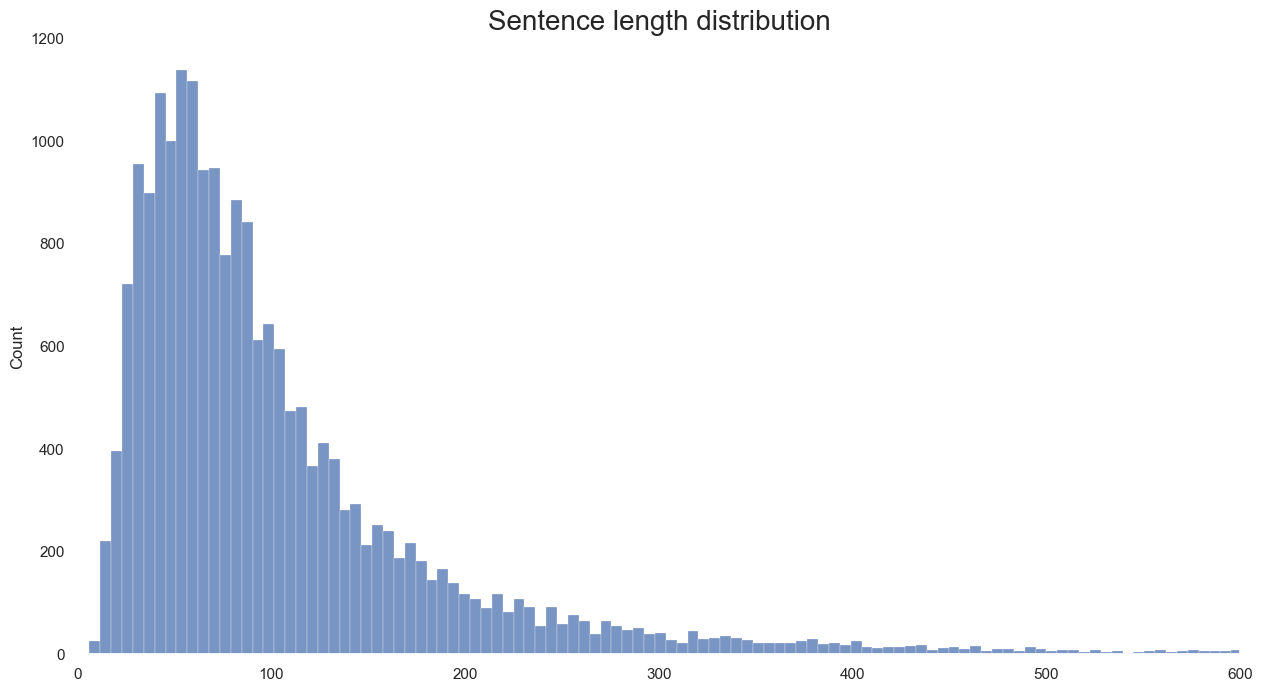

In [35]:
fig, ax = plt.subplots()
sns.set(rc={'figure.figsize':(12,9)})
length_dist = [len(x.split(" ")) for x in X]
sns.histplot(length_dist,palette="pastel")
ax.patch.set_visible(False)
ax.set_xlim(0,600)
ax.set_ylim(0,1200)
ax.set_title("Sentence length distribution",fontsize=20);
plt.show()

In [36]:
X = tokenizer.texts_to_sequences(X)

max_length = max([len(x) for x in X])
vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("max length of sentence: {}".format(max_length))

Vocabulary size: 48977
max length of sentence: 1931


In [37]:
# Padding the reviews [Pads sequences to the same length.]
X = pad_sequences(X, padding='post', maxlen=600)

## Remapping Ratings
remaping of ratings will help us reduce model output size from 6 to 5, which will improve the results.

In [38]:
labels = ['1', '2', '3', '4', '5']
          
y = data['Rating']
y = y.map({1: 0,
            2: 1,
            3: 2,
            4: 3,
            5: 4
           })

# Training
## Train Test split
spliting our data into 90 percent Train and 10 percent test.

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

## Long Short Term Memory(LSTM) :
Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video). For example, LSTM is applicable to tasks such as unsegmented, connected handwriting recognition,speech recognition and anomaly detection in network traffic or IDSs (intrusion detection systems). Wikipedia

## Hyper parameters
These hyperparameters were selected by experimenting and these are the best parameters I can get using this model.

In [41]:
EPOCHS = 2
embedding_dim = 16
BATCH_SIZE = 125
units = 76
val_split = 0.12

In [42]:
model = tf.keras.Sequential([
    L.Embedding(vocab_size, int(embedding_dim), input_length=X.shape[1]),
    L.Bidirectional(L.LSTM(int(units),return_sequences=True)),
    L.Conv1D(64,3),
    L.MaxPool1D(),
    L.Flatten(),
    L.Dropout(0.2),
    L.Dense(128, activation="relu"),
    L.Dropout(0.2),
    L.Dense(64, activation="relu"),
    L.Dropout(0.2),
    L.Dense(5, activation="softmax")
])

## Visualize Model

In [43]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Compiling Model
Using Sparse Categorical Crossentropy, Accuracy metric and ADAM optimizer for training.

In [44]:
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',metrics=['accuracy']
             )

## Training for 2 EPOCHS
After 2 EPOCHS the model metrics starts to fall, so 2 is enought to get best result.

In [45]:
history = model.fit(X_train, y_train, epochs=int(EPOCHS), validation_split=float(val_split), batch_size=int(BATCH_SIZE), verbose=2)

Epoch 1/2
130/130 - 1721s - loss: 1.2075 - accuracy: 0.4671 - val_loss: 0.8918 - val_accuracy: 0.5974 - 1721s/epoch - 13s/step
Epoch 2/2
130/130 - 2335s - loss: 0.8381 - accuracy: 0.6288 - val_loss: 0.8370 - val_accuracy: 0.6213 - 2335s/epoch - 18s/step


## Prediction

In [46]:
pred = model.predict(X_test)
pred_final = np.argmax(pred,axis=-1)
pred_final

65/65 [==============================] - 27s 275ms/step


array([0, 3, 2, ..., 3, 2, 4], dtype=int64)

## Accuracy score on Test Data

This is the best score I got from predicting test data. This could be improved by using a better deep learning model and text processing.

In [47]:
from sklearn.metrics import accuracy_score
print('Accuracy: {}%'.format(round(accuracy_score(pred_final, y_test)*100),2))

Accuracy: 63%


## Root Mean Square Error on Test Data
The root-mean-square deviation or root-mean-square error is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In [48]:
from sklearn.metrics import mean_squared_error
print("Root mean square error: {}".format(round(np.sqrt(mean_squared_error(pred_final,y_test)),3)))

Root mean square error: 0.73


## Saving model

In [49]:
model.save("Tripadvisor_BiLSTM.h5")

## Testing Saved model

In [50]:
new_model = tf.keras.models.load_model('Tripadvisor_BiLSTM.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 600, 16)           783632    
                                                                 
 bidirectional (Bidirectiona  (None, 600, 152)         56544     
 l)                                                              
                                                                 
 conv1d (Conv1D)             (None, 598, 64)           29248     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 299, 64)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 19136)             0         
                                                                 
 dropout (Dropout)           (None, 19136)             0